#### Imports

In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import joblib

import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from data_generator import data_generator_simple_nn
from model import neural_net
from tensorflow.keras import models
from sklearn.model_selection import train_test_split


### Load the data

In [2]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/diffusion0.1/'

holdout = 10
nsteps = 10
x_resolution = 100
dim=2           #Load u(x, t), x and t as input

data = data_generator_simple_nn(output_dir, holdout=holdout, nsteps = nsteps, dim=dim, csv=1, x_res=100)
X_train_base, Y_train_base, X_test, Y_test = data.read_1d()
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_base[:,:,:], 
                                                                Y_train_base, test_size=0.2, 
                                                                shuffle=False)

The grid search is performed on high time resolution data

In [3]:
path='../src/'
# Load best hyperparameters
best_params = joblib.load(path+"best_params.pkl")
print("Best parameters:")
print(best_params)

Best parameters:
{'model__activation': 'relu', 'model__dropout_param': 0.0, 'model__learning_rate': 0.001, 'model__n_layers': 2, 'model__n_units': 24}


### Build the baseline NN

In [4]:
model_instantiate = neural_net(n_layers=2, 
                               n_units=24,
                               activation='relu',
                               nx = x_resolution, 
                               dim=dim,
                               K=nsteps)
my_model = model_instantiate.simple_nn_multistep()
my_model.summary()

Model: "simple_neuralnet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 24)             │         4,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1000)           │        25,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Reshape)          │ (None, 100, 10, 1)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,424 (118.84 KB)

 Trainable params: 30,424 (118.84 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [5]:
# Set learning rate here
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
my_model.build(input_shape=(None, 100, 3))  # assuming nx = 100
my_model.compile(loss='mse', optimizer=optimizer)

In [6]:
history = my_model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/200


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.2630 - val_loss: 0.1065
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2504 - val_loss: 0.1013
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2409 - val_loss: 0.0954
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2280 - val_loss: 0.0878
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2117 - val_loss: 0.0787
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1919 - val_loss: 0.0685
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1695 - val_loss: 0.0584
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1452 - val_loss: 0.0496
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1217 - val_loss: 0.0432
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1002 - val_loss: 0.0395
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0823 - val_loss: 0.0375
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0667 - val_loss: 0.0352


##### 🎨 Make the plots pretty 

In [7]:

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

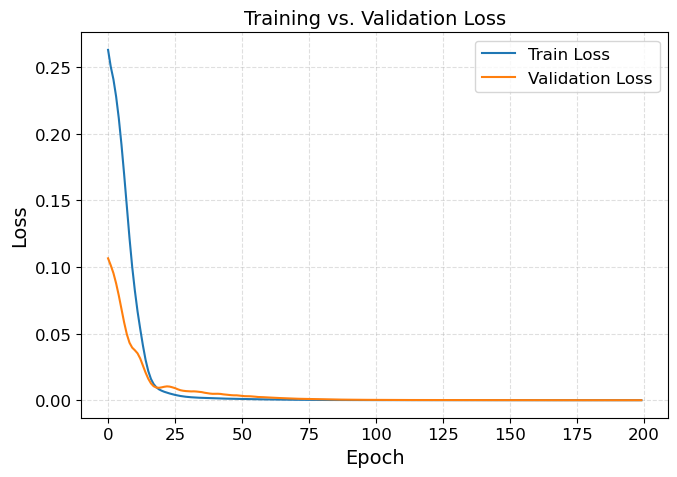

In [8]:

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Check the prediction of the Validation Set

In [9]:
u_pred = my_model.predict(X_validation)
print(u_pred.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(17, 100, 10, 1)


#### This is the Validation set prediction

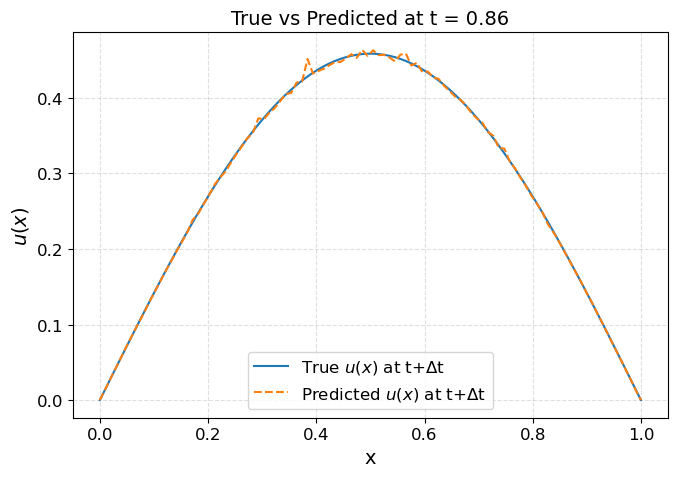

In [30]:

files = sorted([f for f in os.listdir(output_dir) if f.startswith('data_') and f.endswith('.csv')])
nt = len(files)
var_t = np.zeros((nt))
for i, file in enumerate(files):
    data = pd.read_csv(os.path.join(output_dir, file))
    var_t[i] = data["t"].iloc[0]



i=15
split_frac = int(0.8 * (nt - holdout))
ind_t = split_frac + i
time = np.round(var_t[ind_t], 2)
# which test example to look at

fig,ax = plt.subplots(1,1,figsize=(7,5))
plt.plot(X_train_base[i,:,1], Y_validation[i, :, 0], label='True $u(x)$ at t+Δt')
plt.plot(X_train_base[i,:,1], u_pred[i, :, 0], '--', label='Predicted $u(x)$ at t+Δt')

plt.legend()
plt.xlabel('x')
plt.ylabel('$u(x)$')
plt.title("True vs Predicted at t = {}".format(time))
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_85688/3133580006.py:19: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(X_test[1,:,1], (Y_test[0, :, 0]-u_pred_test[0, :, 0])/Y_test[0, :, 0], label='t+Δt')
/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_85688/3133580006.py:20: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(X_test[7,:,1], (Y_test[9, :, 1]-u_pred_test[0, :, 9])/Y_test[9, :, 1], label='t+9Δt')


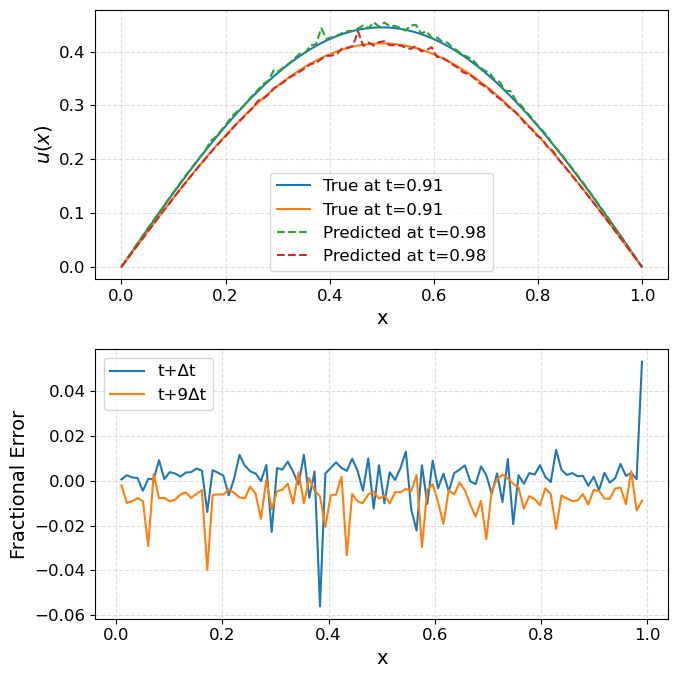

In [39]:
u_pred_test = my_model.predict(X_test)

fig,(ax1, ax2) = plt.subplots(2,1,figsize=(7,7))
ax1.plot(X_test[1,:,1], Y_test[1,:,0], label=f"True at t={var_t[nt - holdout + 1]:.2f}")
ax1.plot(X_test[7,:,1], Y_test[7, :, 1], label=f"True at t={var_t[nt - holdout + 1]:.2f}")

ax1.plot(X_test[0,:,1], u_pred_test[0, :, 0], '--', label=f"Predicted at t={var_t[nt - holdout + 8]:.2f}")
ax1.plot(X_test[0,:,1], u_pred_test[0, :, 8], '--', label=f"Predicted at t={var_t[nt - holdout + 8]:.2f}")

ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('$u(x)$')

# Grid, legend, and tight layout
ax1.grid(True, linestyle='--', alpha=0.4)
ax1.legend(loc='best')


ax2.plot(X_test[1,:,1], (Y_test[0, :, 0]-u_pred_test[0, :, 0])/Y_test[0, :, 0], label='t+Δt')
ax2.plot(X_test[7,:,1], (Y_test[9, :, 1]-u_pred_test[0, :, 9])/Y_test[9, :, 1], label='t+9Δt')


ax2.legend()
plt.xlabel('x')
plt.ylabel('Fractional Error')
ax2.grid(True, linestyle='--', alpha=0.4)

fig.tight_layout()
plt.show()